In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd

import os
dir_black = os.path.join('/content/drive/MyDrive/Soil types/Black Soil')
dir_Cinder = os.path.join('/content/drive/MyDrive/Soil types/Cinder Soil')
dir_Laterite = os.path.join('/content/drive/MyDrive/Soil types/Laterite Soil')
dir_peat = os.path.join('/content/drive/MyDrive/Soil types/Peat Soil')
dir_yellow = os.path.join('/content/drive/MyDrive/Soil types/Yellow Soil')

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Soil types',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 166 images belonging to 5 classes.


In [10]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [11]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [34]:
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.4),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.4),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.4),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dropout(0.3),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 109, 109, 16)     0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 109, 109, 16)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 53, 53, 32)       

In [36]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

# Assuming you have defined your model architecture here

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [37]:
total_sample = train_generator.n
n_epochs = 35

In [38]:
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 1)

Epoch 1/35
16/16 [==============================] - 9s 422ms/step - loss: 1.7257 - acc: 0.1987
Epoch 2/35
16/16 [==============================] - 9s 546ms/step - loss: 1.5791 - acc: 0.2564
Epoch 3/35
16/16 [==============================] - 8s 484ms/step - loss: 1.4287 - acc: 0.3654
Epoch 4/35
16/16 [==============================] - 8s 483ms/step - loss: 1.3344 - acc: 0.4231
Epoch 5/35
16/16 [==============================] - 10s 621ms/step - loss: 1.2084 - acc: 0.4231
Epoch 6/35
16/16 [==============================] - 7s 420ms/step - loss: 1.0902 - acc: 0.4936
Epoch 7/35
16/16 [==============================] - 9s 566ms/step - loss: 1.0313 - acc: 0.5128
Epoch 8/35
16/16 [==============================] - 7s 438ms/step - loss: 1.0116 - acc: 0.4679
Epoch 9/35
16/16 [==============================] - 7s 431ms/step - loss: 0.9941 - acc: 0.5769
Epoch 10/35
16/16 [==============================] - 12s 769ms/step - loss: 0.9026 - acc: 0.6090
Epoch 11/35
16/16 [============================

In [39]:
import matplotlib.pyplot as plt

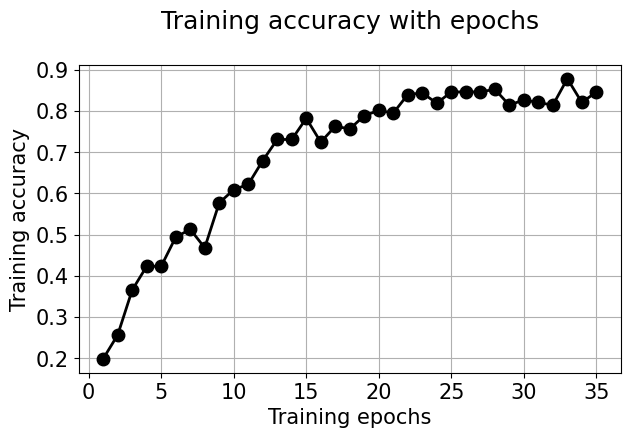

In [40]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [41]:
model.save('my_model.h5')

In [42]:
model.save(filepath="save_model/")